In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint
import scipy.constants as cste

import time

# TD 3: Signal Processing

### DFT Discrete Fourier transform

N_p=5


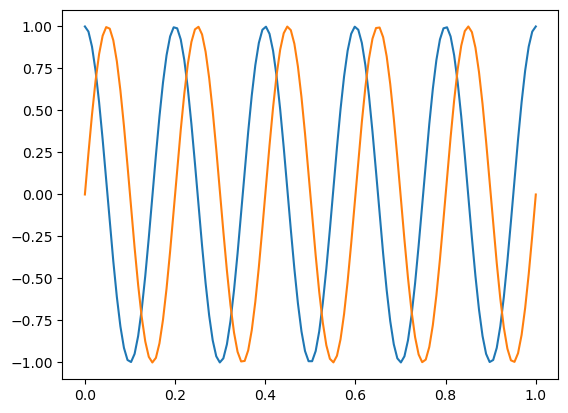

In [2]:
T_a = 1
f_0 = 5
N_p = T_a*f_0

print(f"{N_p=}")

N_e = 128

f_e = N_e/T_a # sampling frequency

t_tab = np.linspace(0, T_a, N_e)

signal_1 = np.cos(2*np.pi*f_0*t_tab)
signal_2 = np.sin(2*np.pi*f_0*t_tab)
plt.plot(t_tab, signal_1)
plt.plot(t_tab, signal_2)
plt.show()


In [3]:
f_tab = np.linspace(-f_e/2, f_e/2, 1024)

def DFT_mano(s_a, f, f_e):
    T_e = 1/f_e

    dft = np.zeros(len(f))*1j
    for n in range(len(s_a)):
        dft += s_a[n]*np.exp(-1j*2*np.pi*f*n*T_e)*T_e
   

    return dft


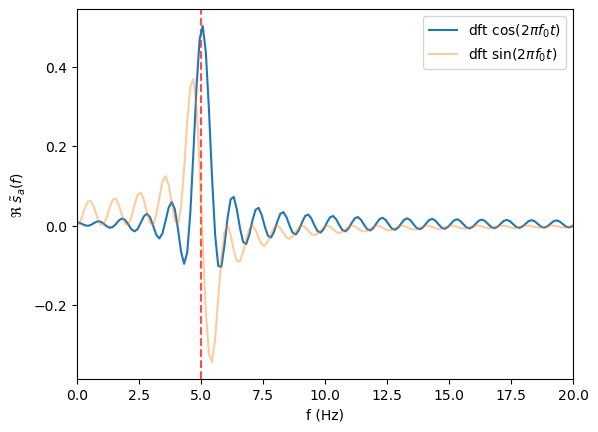

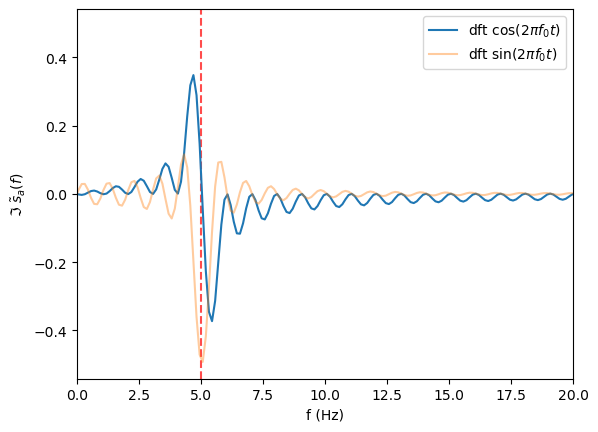

In [4]:
sig_1_dft = DFT_mano(signal_1, f_tab, f_e)
sig_2_dft = DFT_mano(signal_2, f_tab, f_e)


plt.axvline(f_0, c="r", linestyle='dashed', alpha=0.7)
plt.plot(f_tab, sig_1_dft.real, label="dft $\cos(2\pi f_0 t)$")
plt.plot(f_tab, sig_2_dft.real, label="dft $\sin(2\pi f_0 t)$", alpha=0.4)
plt.xlim((0, 20))
plt.legend()

plt.xlabel("f (Hz)")
plt.ylabel(r"$\Re$ $\tilde s_a(f)$")
plt.show()

plt.axvline(f_0, c="r", linestyle='dashed', alpha=0.7)
plt.plot(f_tab, sig_1_dft.imag, label="dft $\cos(2\pi f_0 t)$")
plt.plot(f_tab, sig_2_dft.imag, label="dft $\sin(2\pi f_0 t)$", alpha=0.4)
plt.xlim((0, 20))
plt.legend()

plt.xlabel("f (Hz)")
plt.ylabel(r"$\Im$ $\tilde s_a(f)$")
plt.show()

in theory, since it is a pure sinusoidal, the exact FT would be a real delta function centred at $f_0$

### FFT Fast Fourier Transform

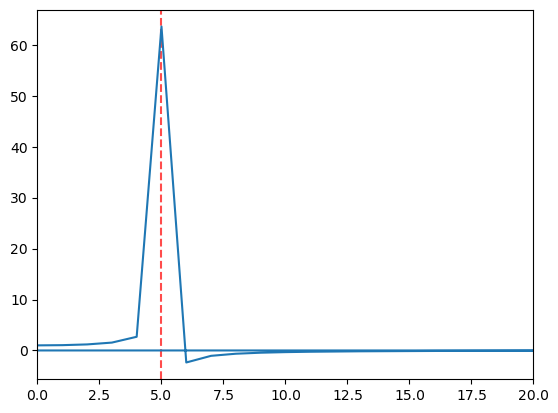

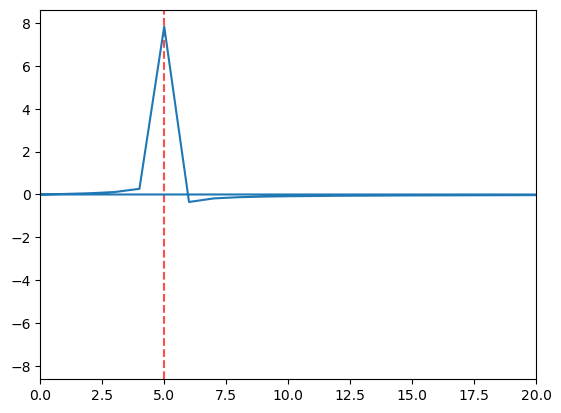

In [5]:
sig_1_fft = np.fft.fft(signal_1)
freq_domain = np.fft.fftfreq(N_e, 1/f_e)

plt.axvline(f_0, c="r", linestyle='dashed', alpha=0.7)
plt.plot(freq_domain, sig_1_fft.real)
plt.xlim((0, 20))
plt.show()

plt.axvline(f_0, c="r", linestyle='dashed', alpha=0.7)
plt.plot(freq_domain, sig_1_fft.imag)
plt.xlim((0, 20))
plt.show()

sampling frequency is low, so we aren't expecting anything fantastic

if $T_a=0.9$

N_p3=4.5


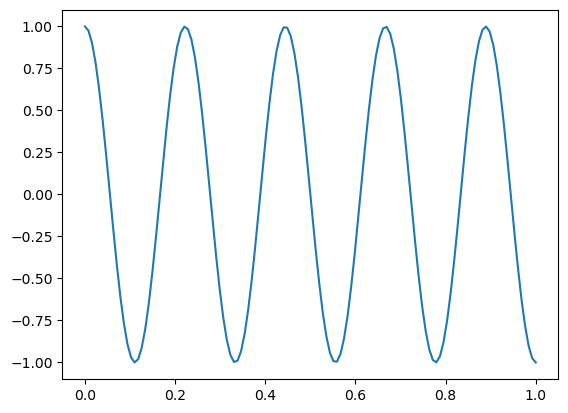

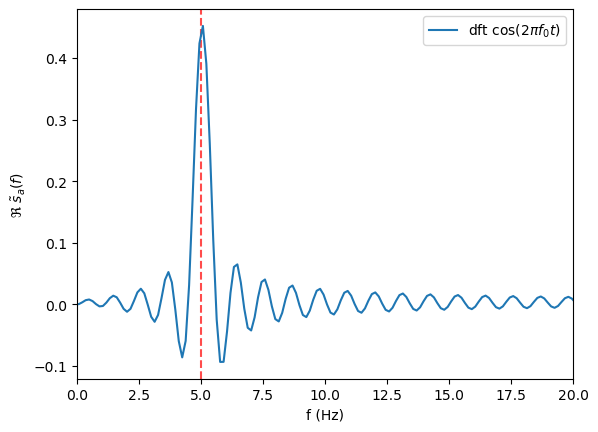

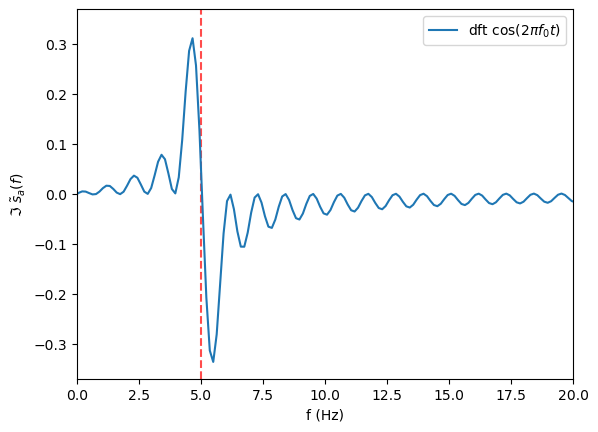

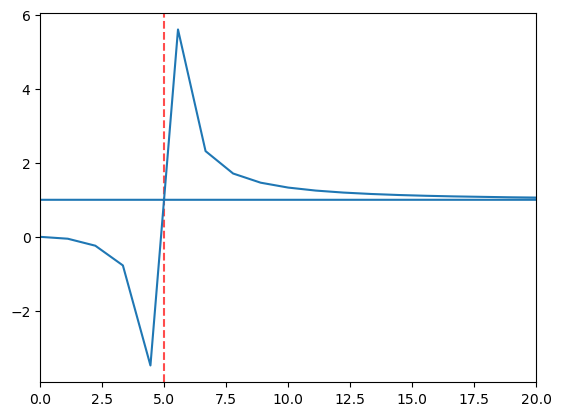

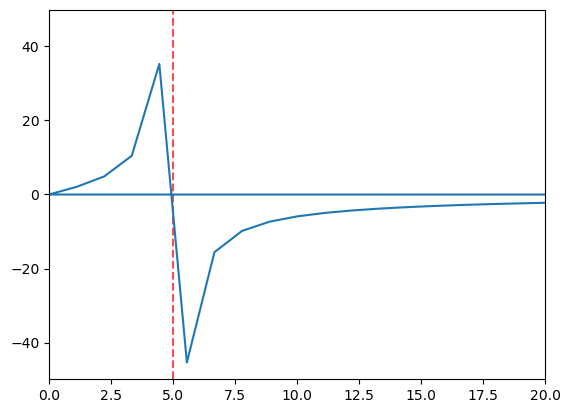

In [12]:
T_a3 = 0.9
f_0 = 5
N_p3 = T_a3*f_0

print(f"{N_p3=}")

N_e3 = 128

f_e3 = N_e3/T_a3 # sampling frequency

t_tab3 = np.linspace(0, T_a3, N_e3)

signal_3 = np.cos(2*np.pi*f_0*t_tab3)
plt.plot(t_tab, signal_3)
plt.show()

f_tab3 = np.linspace(-f_e3/2, f_e3/2, 1024)

## DFT manual

sig_3_dft = DFT_mano(signal_3, f_tab3, f_e3)

plt.axvline(f_0, c="r", linestyle='dashed', alpha=0.7)
plt.plot(f_tab3, sig_3_dft.real, label="dft $\cos(2\pi f_0 t)$")
plt.xlim((0, 20))
plt.legend()

plt.xlabel("f (Hz)")
plt.ylabel(r"$\Re$ $\tilde s_a(f)$")
plt.show()

plt.axvline(f_0, c="r", linestyle='dashed', alpha=0.7)
plt.plot(f_tab3, sig_3_dft.imag, label="dft $\cos(2\pi f_0 t)$")
plt.xlim((0, 20))
plt.legend()

plt.xlabel("f (Hz)")
plt.ylabel(r"$\Im$ $\tilde s_a(f)$")
plt.show()

## FFT

sig_3_fft = np.fft.fft(signal_3, N_e3)
freq_domain3 = np.fft.fftfreq(N_e3, 1/f_e3)

plt.axvline(f_0, c="r", linestyle='dashed', alpha=0.7)
plt.plot(freq_domain3, sig_3_fft.real)
plt.xlim((0, 20))
plt.show()

plt.axvline(f_0, c="r", linestyle='dashed', alpha=0.7)
plt.plot(freq_domain3, sig_3_fft.imag)
plt.xlim((0, 20))
plt.show()

the FFT result is really off

128


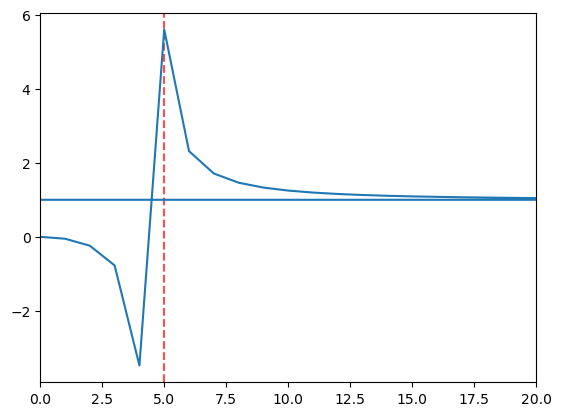

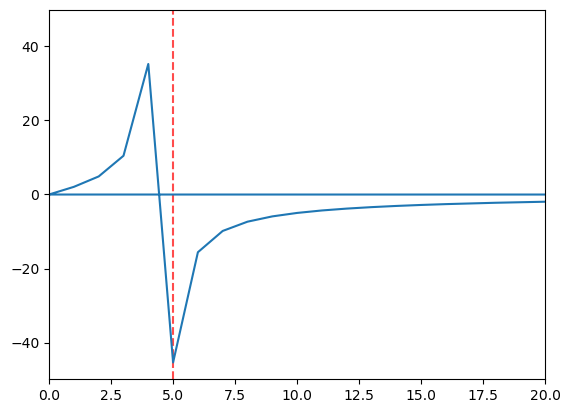

In [41]:
# resize array
signal_3_az = np.zeros(len(t_tab))#signal_3.resize()
for i in range(len(signal_3)):
    signal_3_az[i] = signal_3[i]

# resizing process is not actually necessary, numpy will pad the array
    # with extra 0s if we give n > len(signal)
    

print(N_e)
sig_3_az_fft = np.fft.fft(signal_3_az, N_e)


freq_domain3_az = np.fft.fftfreq(N_e, 1/f_e)

plt.axvline(f_0, c="r", linestyle='dashed', alpha=0.7)
plt.plot(freq_domain3_az, sig_3_az_fft.real)
plt.xlim((0, 20))
plt.show()

plt.axvline(f_0, c="r", linestyle='dashed', alpha=0.7)
plt.plot(freq_domain3_az, sig_3_az_fft.imag)
plt.xlim((0, 20))
plt.show()


Its better, the peaks line up. Still not as good as when $T_a = 1$

In [60]:
# time DFT mano for T_a = 0.9

t0_dft = time.time()
DFT_mano(signal_3, f_tab3, f_e3)
t1_dft = time.time()

print(f"DFT mano run time {t1_dft - t0_dft:.3} s")


# time

t0_fft = time.time()
np.fft.fft(signal_3_az, N_e)
t1_fft = time.time()

print(f"numpy FFT run time {t1_fft - t0_fft:.3} s")

print(f"FFT is {(t1_dft - t0_dft)/(t1_fft - t0_fft):.4} times faster")

DFT mano run time 0.0109 s
numpy FFT run time 0.000371 s
FFT is 29.33 times faster


### Signal filtering

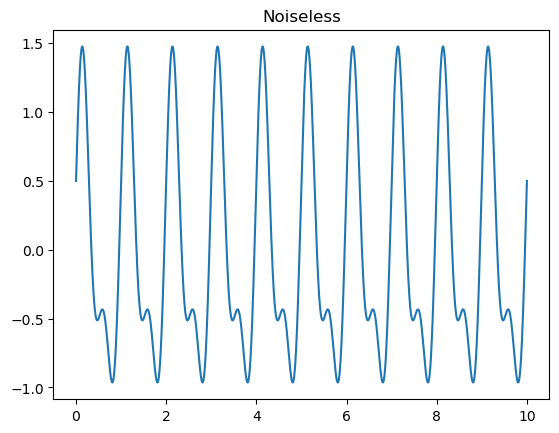

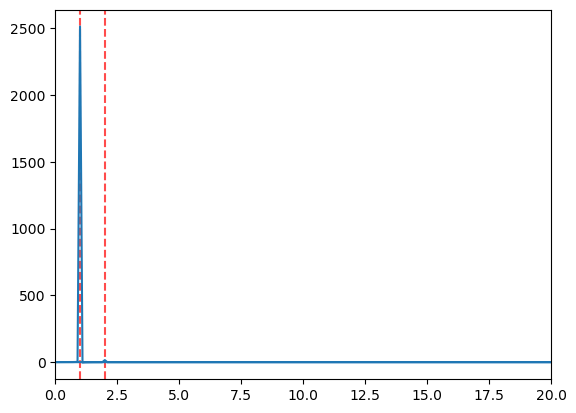

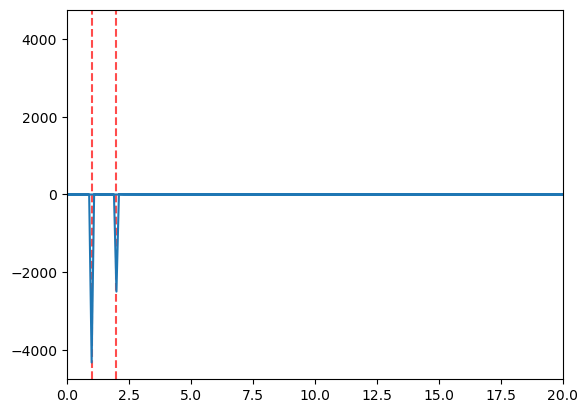

In [66]:
A_1 = 1
A_2 = 0.5
phi_1 = np.pi/6
phi_2 = 0
nu_1 = 1
nu_2 = 2

f_sample = 1000
t_max = 10
N_sample = f_sample*t_max


t_f = np.linspace(0, 10, N_sample)

f = A_1*np.sin(2*np.pi*nu_1*t_f + phi_1) + A_2*np.sin(2*np.pi*nu_2*t_f + phi_2)
plt.plot(t_f, f)
plt.title("Noiseless")
plt.show()


f_fft = np.fft.fft(f, N_sample)


freq_domain = np.fft.fftfreq(N_sample, 1/f_sample)

plt.axvline(nu_1, c="r", linestyle='dashed', alpha=0.7)

plt.axvline(nu_2, c="r", linestyle='dashed', alpha=0.7)
plt.plot(freq_domain, f_fft.real)
plt.xlim((0, 20))
plt.show()
plt.axvline(nu_1, c="r", linestyle='dashed', alpha=0.7)

plt.axvline(nu_2, c="r", linestyle='dashed', alpha=0.7)
plt.plot(freq_domain, f_fft.imag)
plt.xlim((0, 20))
plt.show()





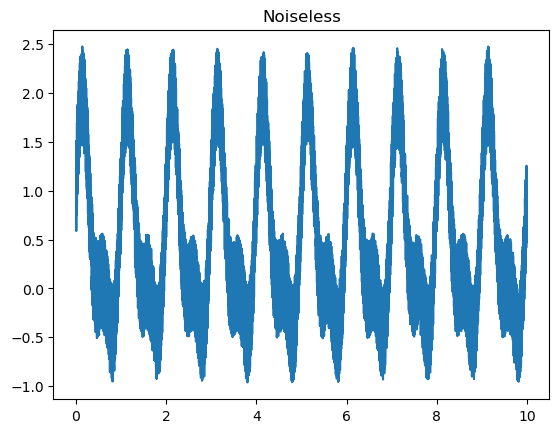

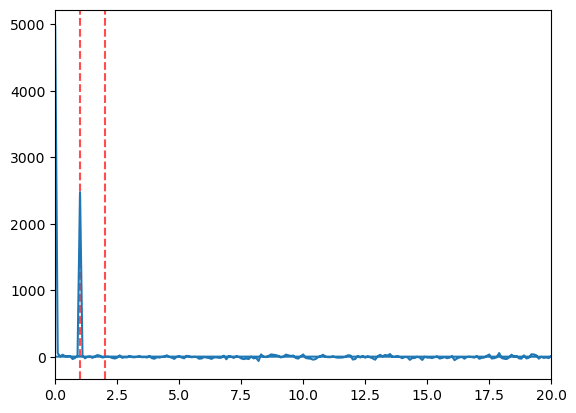

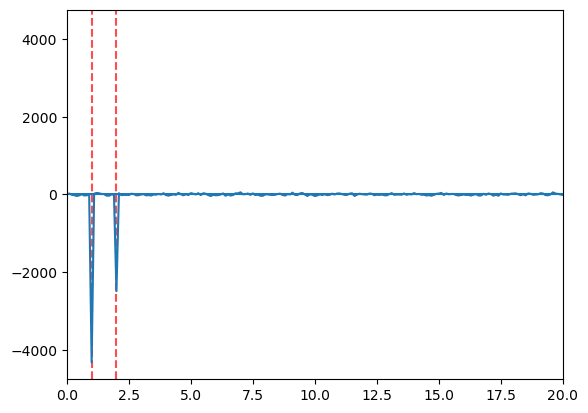

In [68]:
noise = np.random.random_sample(N_sample)
f_noisy = f + noise
plt.plot(t_f, f_noisy)
plt.title("Noiseless")
plt.show()


f_noisy_fft = np.fft.fft(f_noisy, N_sample)


plt.axvline(nu_1, c="r", linestyle='dashed', alpha=0.7)

plt.axvline(nu_2, c="r", linestyle='dashed', alpha=0.7)
plt.plot(freq_domain, f_noisy_fft.real)
plt.xlim((0, 20))
plt.show()
plt.axvline(nu_1, c="r", linestyle='dashed', alpha=0.7)

plt.axvline(nu_2, c="r", linestyle='dashed', alpha=0.7)
plt.plot(freq_domain, f_noisy_fft.imag)
plt.xlim((0, 20))
plt.show()


$\Pi$ is the heavy-side gate